In this notebook, we present various usecases to interact with ptype to handle anomaly type predictions.

In [1]:
# Preamble to run notebook in context of source package.
# NBVAL_IGNORE_OUTPUT
import sys
sys.path.insert(0, '../')

In [2]:
from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults()

from ptype.Column import Column2ARFF
from ptype.Ptype import Ptype
from ptype.utils import evaluate_types
import pandas as pd
import numpy as np
from utils import *

# 1. Incorrect anomaly prediction

In [3]:
column = 'Status'
df = read_data(dataset_name='data_gov_10151_1', header=0)
df_subsample = subsample_df(df, column_to_sample_from = column, sample_num = 20)
df_subsample

,Status
92,M
83,M
32,M
80,M
78,T
17,M
35,M
81,M
88,M
91,M


In [4]:
df = read_data(dataset_name='data_gov_10151_1', header=0)
df.head()

,ï»¿OBJECTID,Loc_name,Status,Score,Match_type,Match_addr,Side,Ref_ID,X,Y,...,Addr_type,ARC_Street,ARC_City,ARC_State,ARC_ZIP,Name,Municipali,Address,Municipa_1,ZipCodes
0,1,DW_Addressing_,M,95.42,A,"1710 PACIFIC AVE, HARRISON, PA, 15065",,3150892,1420542.434568,475246.110473,...,StreetAddress,1710 Pacific Avenue,Natrona Heights,,15065,Community Market,Natrona Heights,1710 Pacific Avenue,Natrona Heights,15065
1,2,DW_Addressing_,M,93.91,A,"1117 MILLTOWN RD, PENN HILLS, PA, 15147",,3148048,1401019.429449,431068.460889,...,StreetAddress,1117 Mill Town Road,Verona,,15147,Community Market,Verona,1117 Mill Town Road,Verona,15147
2,3,DW_Addressing_,M,100,A,"1017 4TH AVE, CORAOPOLIS, PA, 15108",,3083227,1297767.802053,440835.299188,...,StreetAddress,1017 4th Avenue,Coraopolis,,15108,Coraopolis Cash Market,Coraopolis,1017 4th Avenue,Coraopolis,15108
3,4,DW_Addressing_,M,100,A,"5055 LIBRARY RD, BETHEL PARK, PA, 15102",,2693039,1334758.100618,374326.901636,...,StreetAddress,5055 Library Road,Bethel Park,,15102,Giant Eagle,Bethel Park,5055 Library Road,Bethel Park,15102
4,5,DW_Addressing_,M,100,A,"254 YOST BLVD, BRADDOCK HILLS, PA, 15221",,2805222,1382335.999685,400839.100961,...,StreetAddress,254 Yost Boulevard,Braddock Hills,,15221,Giant Eagle,Braddock Hills,254 Yost Boulevard,Pittsburgh,15221


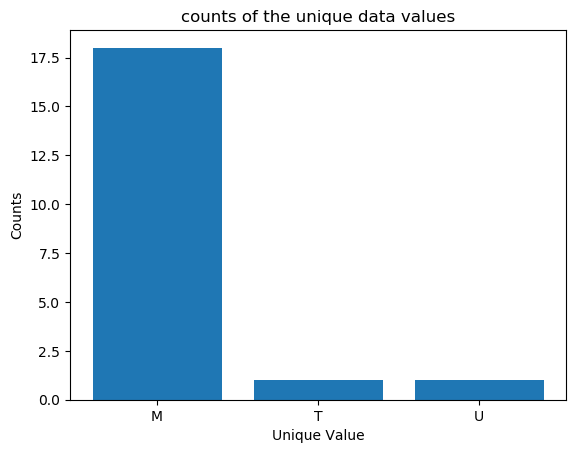

In [5]:
unique_values, counts = np.unique(
    [str(int_element) for int_element in df_subsample[column].tolist()],
    return_counts=True,
)
plot_bar(
    unique_values,
    counts,
    title="counts of the unique data values",
    y_lim_max=None,
    xlabel="Unique Value",
    ylabel="Counts",
)

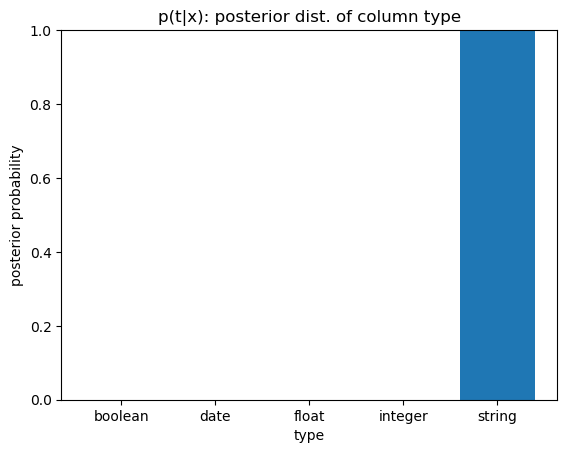

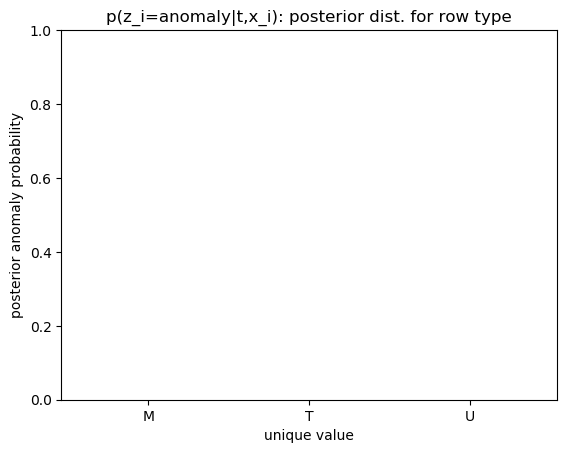

In [6]:
ptype = Ptype()
ptype.fit_schema(df_subsample)

plot_column_type_posterior(ptype.cols[column].p_t)

# features = ptype.features[column]
# arff_type, arff_post = column2ARFF.get_arff(features)

# plot_arff_type_posterior(arff_post)

plot_row_type_posterior(ptype.cols[column], t='anomaly')

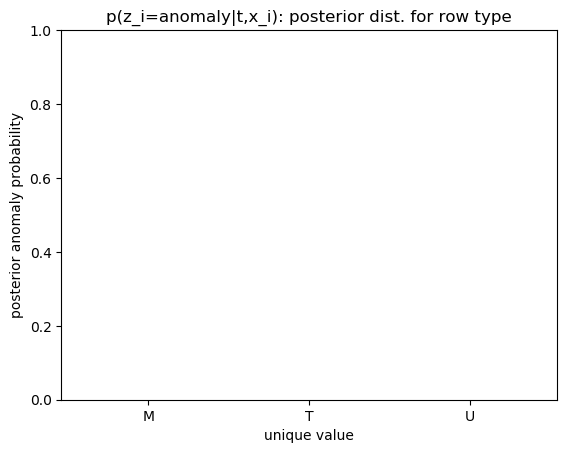

In [7]:
ptype.cols[column].reclassify_normal(['T', 'U'])

plot_row_type_posterior(ptype.cols[column], t='anomaly')

# 2. Incorrect anomaly prediction

,Gender
972,Male
719,Man
979,Male
550,Woman
512,M
119,Male
1206,Male
107,Male
653,Female
1074,m


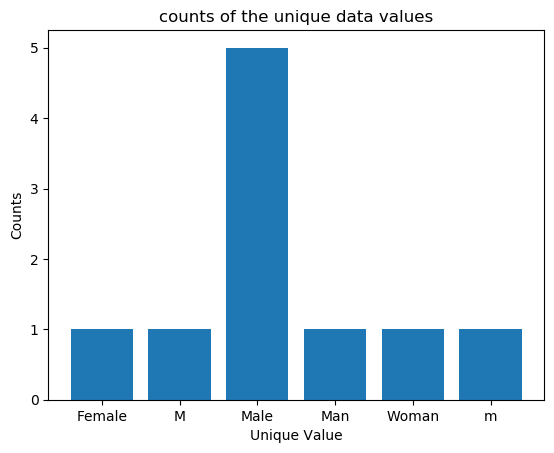

In [8]:
df = read_data(dataset_name="survey", header=0)

column = "Gender"
df_subsample = subsample_df(df, column_to_sample_from=column, sample_num=10)
display(df_subsample)

unique_values, counts = np.unique(
    [str(int_element) for int_element in df_subsample[column].tolist()],
    return_counts=True,
)
plot_bar(
    unique_values,
    counts,
    title="counts of the unique data values",
    y_lim_max=None,
    xlabel="Unique Value",
    ylabel="Counts",
)

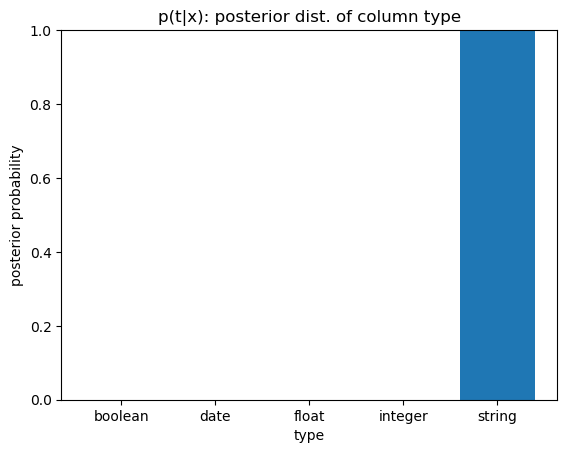

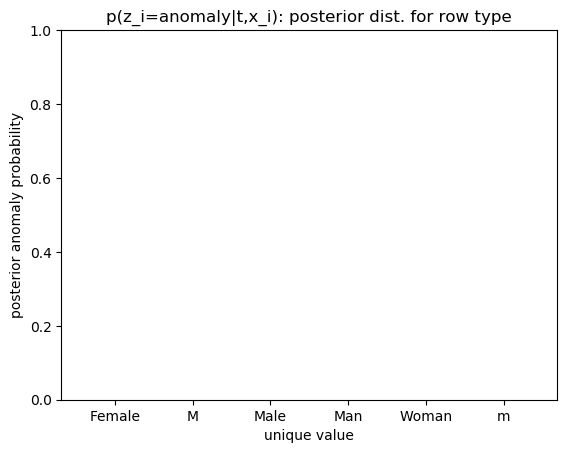

In [9]:
ptype.fit_schema(df_subsample)
# features = ptype.features[column]
# arff_type, arff_post = column2ARFF.get_arff(features)

plot_column_type_posterior(ptype.cols[column].p_t)

# plot_arff_type_posterior(arff_post)


plot_row_type_posterior(ptype.cols[column], t='anomaly')